/tmp/ipykernel_40110/3995054626.py:3: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


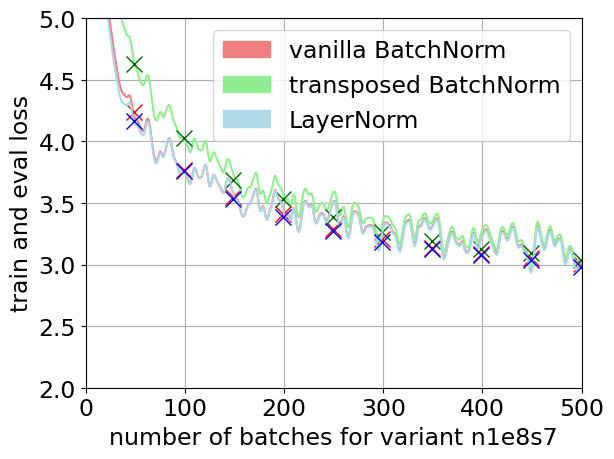

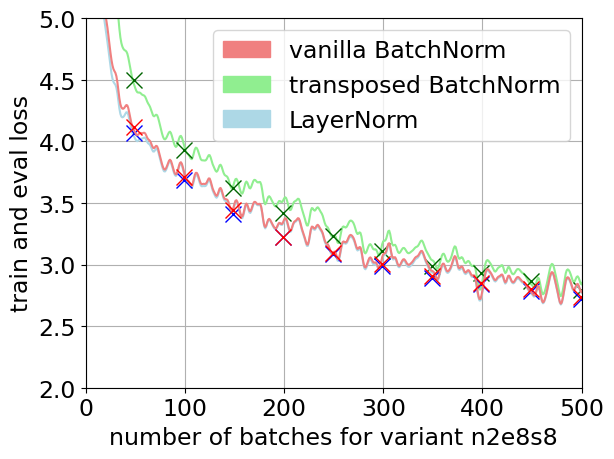

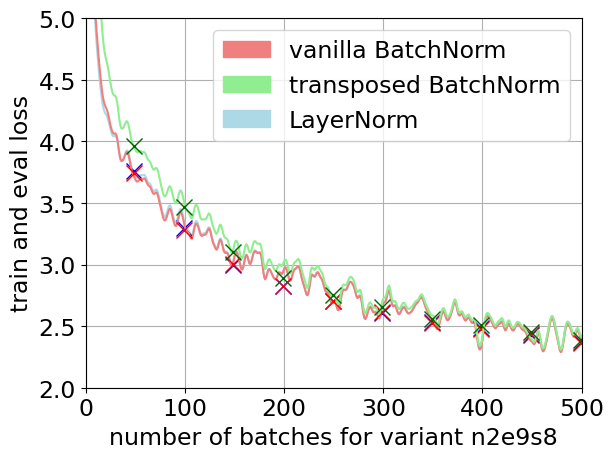

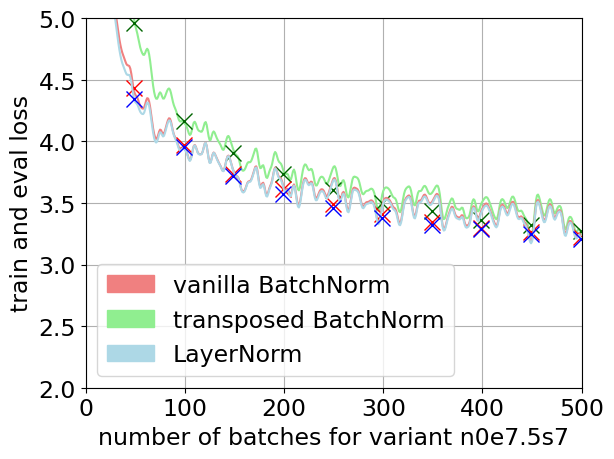

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d
import tomli
import matplotlib.patches as mpatches

l_width = 1.5
m_size = 12
marker1 = 'x'
marker2 = 'x'
marker3 = 'x'

BIGGER_SIZE = 17

n_nano    = "n0e7.5s7"
n_tiny    = "n1e8s7"
n_smaller = "n2e8s8"
n_small   = "n2e9s8"

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

with open("new_logs_noq.toml", "rb") as f:
    toml_dict = tomli.load(f)
    # toml_dict keys: run: [] : config, params, train_loss, eval_iter, eval_loss, eval_loss_last_train, checkpoints, export
    tiny = []
    smaller = []
    small = []
    nano= []
    for i, run in enumerate(toml_dict['runs']):
        if "n_head=2" in run['config'] and "n_layer=1" in run['config']:
            nano.append(run)
        if "n_head=2" in run['config'] and "n_layer=2" in run['config']:
            tiny.append(run)
        if "n_head=4" in run['config']:
            smaller.append(run)
        if "n_head=8" in run['config']:
            small.append(run)
  
    #fig, axs = plt.subplots(ncols=1, nrows=3, layout="constrained", figsize=(7, 14))
    #ax = axs[0]
    plt.figure(0)
    for i, run in enumerate(tiny):
        train_x_points = np.arange(len(run['train_loss']))
        train_y_points = np.array(run['train_loss'])
        
        eval_x_points = train_x_points 
        eval_y_points = np.empty(train_y_points.size)
        eval_y_points[:] = np.nan
        eval_y_points = eval_y_points.astype(np.double)
    
        eval_point_mask = np.isnan(eval_y_points)
        
        for j,l in enumerate(run['eval_loss']):
            eval_y_points[(j)*run['eval_iter'] - 1 ] = l
        eval_y_points[0] = 10
        if "LayerNorm" in run['config']:
            t_c = 'lightblue'
            e_c = 'blue'
            marker = marker1
        if "BatchNormTranspose" in run['config']:
            t_c = 'lightgreen'
            e_c = 'darkgreen'
            marker = marker2
        if "BatchNormIdPure" in run['config']:
            t_c = 'lightcoral'
            e_c = 'red'
            marker = marker3
        
        train_y_points = gaussian_filter1d(train_y_points, sigma=2) # filter for smoothness

        bn_patch = mpatches.Patch(color='lightcoral', label='vanilla BatchNorm')
        bnt_patch = mpatches.Patch(color='lightgreen', label='transposed BatchNorm')
        ln_patch = mpatches.Patch(color='lightblue', label='LayerNorm')
        plt.legend(handles=[bn_patch, bnt_patch, ln_patch])
        
        plt.plot(train_x_points, train_y_points, t_c, linestyle='-', marker='', markersize=1, linewidth=l_width) 
        plt.plot(eval_x_points[eval_point_mask], eval_y_points[eval_point_mask], e_c, marker=marker,  linestyle='-',  markersize=m_size)
        
        display_num_steps = 10
        
        iter_display_limit = run['eval_iter'] * display_num_steps
        print(run['export'])

    
    #plt.xlabel(f"samples for {'_'.join(run['checkpoints'][0].split('/')[-1].split('_')[1:5])}")
    #plt.set_title(f"gpt-2 variant tiny")
    #plt.set_xlabel('number of batches')
    #plt.set_ylabel("train and eval loss")
    #plt.set_ylim(2, 5)
    #plt.set_xlim(0, iter_display_limit)
    plt.xlabel(f'number of batches for variant {n_tiny}')
    plt.ylabel("train and eval loss")
    plt.ylim(2, 5)
    plt.xlim(0, iter_display_limit)
    plt.grid()
    #plt.show()
    
    #plt = plts[1]
    plt.figure(1)
    for i, run in enumerate(smaller):
        train_x_points = np.arange(len(run['train_loss']))
        train_y_points = np.array(run['train_loss'])
        
        eval_x_points = train_x_points 
        eval_y_points = np.empty(train_y_points.size)
        eval_y_points[:] = np.nan
        eval_y_points = eval_y_points.astype(np.double)
    
        eval_point_mask = np.isnan(eval_y_points)
        
        for j,l in enumerate(run['eval_loss']):
            eval_y_points[(j)*run['eval_iter'] - 1 ] = l
        eval_y_points[0] = 10
        if "LayerNorm" in run['config']:
            t_c = 'lightblue'
            e_c = 'blue'
            marker = marker1
        if "BatchNormTranspose" in run['config']:
            t_c = 'lightgreen'
            e_c = 'darkgreen'
            marker = marker2
        if "BatchNormIdPure" in run['config']:
            t_c = 'lightcoral'
            e_c = 'red'
            marker = marker3
        
        train_y_points = gaussian_filter1d(train_y_points, sigma=2) # filter for smoothness

        bn_patch = mpatches.Patch(color='lightcoral', label='vanilla BatchNorm')
        bnt_patch = mpatches.Patch(color='lightgreen', label='transposed BatchNorm')
        ln_patch = mpatches.Patch(color='lightblue', label='LayerNorm')
        plt.legend(handles=[bn_patch, bnt_patch, ln_patch])
        
        plt.plot(train_x_points, train_y_points, t_c, linestyle='-', marker='', markersize=1, linewidth=l_width) 
        plt.plot(eval_x_points[eval_point_mask], eval_y_points[eval_point_mask], e_c, marker=marker,  linestyle='-',  markersize=m_size)

        display_num_steps = 10
        
        iter_display_limit = run['eval_iter'] * display_num_steps
        print(run['export'])

    
    #plt.xlabel(f"samples for {'_'.join(run['checkpoints'][0].split('/')[-1].split('_')[1:5])}")
    #plt.set_title(f"gpt-2 variant smaller")
    #plt.set_xlabel('number of batches')
    #plt.set_ylabel("train and eval loss")
    #plt.set_ylim(2, 5)
    #plt.set_xlim(0, iter_display_limit)
    plt.xlabel(f'number of batches for variant {n_smaller}')
    plt.ylabel("train and eval loss")
    plt.ylim(2, 5)
    plt.xlim(0, iter_display_limit)
    plt.grid()
    #plt.show()
    
    #plt = plts[2]
    plt.figure(2)
    for i, run in enumerate(small):
        train_x_points = np.arange(len(run['train_loss']))
        train_y_points = np.array(run['train_loss'])
        
        eval_x_points = train_x_points 
        eval_y_points = np.empty(train_y_points.size)
        eval_y_points[:] = np.nan
        eval_y_points = eval_y_points.astype(np.double)
    
        eval_point_mask = np.isnan(eval_y_points)
        
        for j,l in enumerate(run['eval_loss']):
            eval_y_points[(j)*run['eval_iter'] - 1 ] = l
        eval_y_points[0] = 10
        if "LayerNorm" in run['config']:
            t_c = 'lightblue'
            e_c = 'blue'
            marker = marker1
        if "BatchNormTranspose" in run['config']:
            t_c = 'lightgreen'
            e_c = 'darkgreen'
            marker = marker2
        if "BatchNormIdPure" in run['config']:
            t_c = 'lightcoral'
            e_c = 'red'
            marker = marker3
        
        train_y_points = gaussian_filter1d(train_y_points, sigma=2) # filter for smoothness
        
        bn_patch = mpatches.Patch(color='lightcoral', label='vanilla BatchNorm')
        bnt_patch = mpatches.Patch(color='lightgreen', label='transposed BatchNorm')
        ln_patch = mpatches.Patch(color='lightblue', label='LayerNorm')
        plt.legend(handles=[bn_patch, bnt_patch, ln_patch])

        plt.plot(train_x_points, train_y_points, t_c, linestyle='-', marker='', markersize=1, linewidth=l_width) 
        plt.plot(eval_x_points[eval_point_mask], eval_y_points[eval_point_mask], e_c, marker=marker,  linestyle='-',  markersize=m_size)

        display_num_steps = 10
        
        iter_display_limit = run['eval_iter'] * display_num_steps
        print(run['export'])

    
    #plt.xlabel(f"samples for {'_'.join(run['checkpoints'][0].split('/')[-1].split('_')[1:5])}")
    #plt.set_title(f"gpt-2 variant small")
    #plt.set_xlabel('number of batches')
    #plt.set_ylabel("train and eval loss")
    #plt.set_ylim(2, 5)
    #plt.set_xlim(0, iter_display_limit)
    plt.xlabel(f'number of batches for variant {n_small}')
    plt.ylabel("train and eval loss")
    plt.ylim(2, 5)
    plt.xlim(0, iter_display_limit)
    plt.grid()
    
    plt.show()
    
    
    plt.figure(4)
    for i, run in enumerate(nano):
        train_x_points = np.arange(len(run['train_loss']))
        train_y_points = np.array(run['train_loss'])
        
        eval_x_points = train_x_points 
        eval_y_points = np.empty(train_y_points.size)
        eval_y_points[:] = np.nan
        eval_y_points = eval_y_points.astype(np.double)
    
        eval_point_mask = np.isnan(eval_y_points)
        
        for j,l in enumerate(run['eval_loss']):
            eval_y_points[(j)*run['eval_iter'] - 1 ] = l
        eval_y_points[0] = 10
        if "LayerNorm" in run['config']:
            t_c = 'lightblue'
            e_c = 'blue'
            marker = marker1
        if "BatchNormTranspose" in run['config']:
            t_c = 'lightgreen'
            e_c = 'darkgreen'
            marker = marker2
        if "BatchNormIdPure" in run['config']:
            t_c = 'lightcoral'
            e_c = 'red'
            marker = marker3
        
        train_y_points = gaussian_filter1d(train_y_points, sigma=2) # filter for smoothness

        bn_patch = mpatches.Patch(color='lightcoral', label='vanilla BatchNorm')
        bnt_patch = mpatches.Patch(color='lightgreen', label='transposed BatchNorm')
        ln_patch = mpatches.Patch(color='lightblue', label='LayerNorm')
        plt.legend(handles=[bn_patch, bnt_patch, ln_patch])
        
        plt.plot(train_x_points, train_y_points, t_c, linestyle='-', marker='', markersize=1, linewidth=l_width) 
        plt.plot(eval_x_points[eval_point_mask], eval_y_points[eval_point_mask], e_c, marker=marker,  linestyle='-',  markersize=m_size)

        display_num_steps = 10
        
        iter_display_limit = run['eval_iter'] * display_num_steps
        print(run['export'])

    
    #plt.xlabel(f"samples for {'_'.join(run['checkpoints'][0].split('/')[-1].split('_')[1:5])}")
    #plt.set_title(f"gpt-2 variant smaller")
    #plt.set_xlabel('number of batches')
    #plt.set_ylabel("train and eval loss")
    #plt.set_ylim(2, 5)
    #plt.set_xlim(0, iter_display_limit)
    plt.xlabel(f'number of batches for variant {n_nano}')
    plt.ylabel("train and eval loss")
    plt.ylim(2, 5)
    plt.xlim(0, iter_display_limit)
    plt.grid()
    #plt.show()
        